In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

In [8]:
df = pd.read_csv('imbd_cleaned.csv')

import pandas as pd

# Supponiamo che df sia il tuo dataframe
# Seleziona tutte le colonne numeriche
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Aggiungi la colonna 'titleType' alla lista delle colonne da mantenere
columns_to_keep = numerical_columns.tolist() + ['titleType']

# Assegna a X tutte le variabili numeriche e la variabile categorica 'titleType'
X = df[columns_to_keep]

# Assegna a X tutte le variabili numeriche tranne 'titleType'
X = df[numerical_columns]
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['averageRating'])

## Data Partitioning

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [3]:
# !pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

reg = XGBRegressor(tree_method='hist', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 50 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, scoring='neg_mean_squared_error',
    cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise')

# Esegui la random search
random_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:26:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Migliori parametri trovati: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
Miglior punteggio: -1.2554743276377085


In [17]:
from xgboost import XGBRegressor

best_model = XGBRegressor(
    tree_method='hist', 
    use_label_encoder=False, 
    enable_categorical=True,  # Abilita il supporto per le variabili categoriche
    random_state=42,
    subsample=1.0,
    reg_lambda=10,
    reg_alpha=1,
    n_estimators=200,
    max_depth=9,
    learning_rate=0.2,
    gamma=0.3,
    colsample_bytree=0.8
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calcola e stampa le metriche di valutazione
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


R2: 0.314
MSE: 1.247
MAE: 0.821


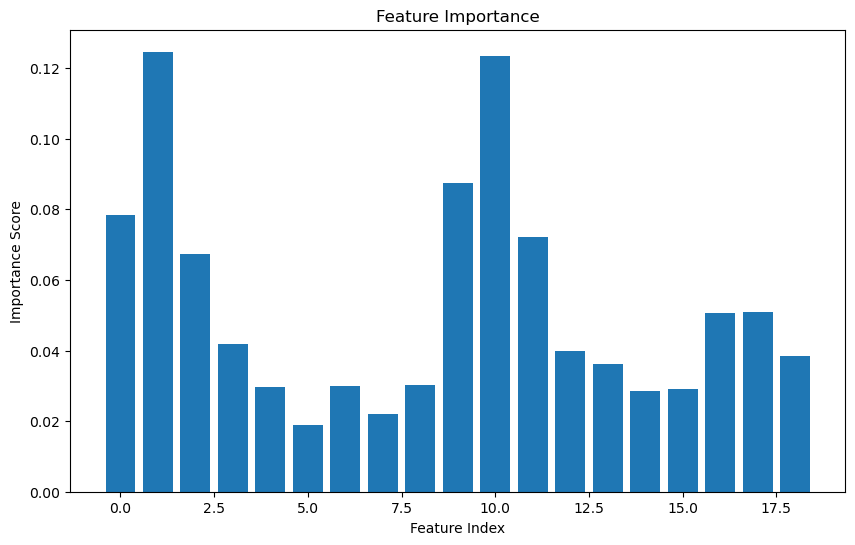

In [18]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Calcola la feature importance
importance = best_model.feature_importances_

# Crea un grafico per visualizzare la feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [23]:
df_num = df.select_dtypes(include=['number'])
df_num = numerical_columns.tolist() + ['titleType']
df_num

['startYear',
 'runtimeMinutes',
 'awardWins',
 'numVotes',
 'totalImages',
 'totalVideos',
 'totalCredits',
 'criticReviewsTotal',
 'AwNmExWins',
 'canHaveEpisodes',
 'isAdult',
 'numRegions',
 'userReviewsTotal',
 'castNumber',
 'companiesNumber',
 'averageRating',
 'externalLinks',
 'writerCredits',
 'directorsCredits',
 'quotesTotal',
 'titleType']

In [26]:
# Supponiamo che df_num sia una lista di nomi di colonne
df_num = [col for col in df_num if col != 'averageRating']

In [30]:
df_num

['startYear',
 'runtimeMinutes',
 'awardWins',
 'numVotes',
 'totalImages',
 'totalVideos',
 'totalCredits',
 'criticReviewsTotal',
 'AwNmExWins',
 'canHaveEpisodes',
 'isAdult',
 'numRegions',
 'userReviewsTotal',
 'castNumber',
 'companiesNumber',
 'externalLinks',
 'writerCredits',
 'directorsCredits',
 'quotesTotal',
 'titleType']

In [33]:
y

array([5.7, 5.4, 5. , ..., 5.6, 7.1, 8.6])

In [27]:
import pandas as pd

# Supponiamo che X_train sia un array di NumPy
# Converti X_train in un DataFrame di Pandas
X_train_df = pd.DataFrame(X_train, columns=df_num)  # Sostituisci con i nomi delle tue feature

# Calcola la feature importance
importance = best_model.feature_importances_

# Crea un DataFrame con i nomi delle feature e la loro importanza
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importance
})

# Ordina il DataFrame per importanza decrescente e seleziona le prime 10 feature
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(19)

# Crea un grafico a barre per visualizzare le 10 feature più importanti
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()


ValueError: Shape of passed values is (104036, 19), indices imply (104036, 20)

In [46]:
df_num

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.000000,4,1.386294,0.000000,0,0,7,2.833213,0.693147,1.386294,2.302585,0.000000,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.000000,2,0.000000,0.000000,0,0,6,0.693147,0.000000,0.000000,1.386294,0.000000,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.000000,1,0.000000,0.000000,0,0,5,0.000000,0.000000,0.693147,1.609438,0.000000,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.000000,4,1.098612,0.000000,0,0,6,3.044522,0.693147,1.945910,1.945910,0.000000,0.693147,0.0
4,1894,2.0,0.000000,7.107425,2.772589,0.000000,1,0.000000,0.000000,0,0,6,2.197225,0.000000,0.000000,1.386294,0.000000,0.693147,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148619,1993,96.0,0.000000,2.484907,0.000000,0.000000,11,0.000000,0.000000,0,0,1,0.000000,0.000000,1.098612,0.693147,0.693147,0.693147,0.0
148620,2019,14.0,0.000000,2.772589,1.609438,0.693147,52,0.693147,1.386294,0,0,1,0.000000,1.945910,1.386294,1.791759,0.693147,0.693147,0.0
148621,2019,0.0,0.000000,2.564949,1.098612,1.386294,32,0.000000,0.000000,0,0,0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.0
148622,2011,10.0,0.000000,2.302585,0.693147,0.000000,15,0.000000,0.000000,0,0,0,0.000000,2.079442,0.000000,0.000000,1.386294,0.693147,0.0
